<a href="https://colab.research.google.com/github/BT21PrKu/Sampling_Assignment/blob/main/SamplingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import the dataset

In [2]:
data = pd.read_csv('/content/Creditcard_data.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

(772, 31)

In [7]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (763, 31)
class 1: (9, 31)


<Axes: xlabel='Class', ylabel='count'>

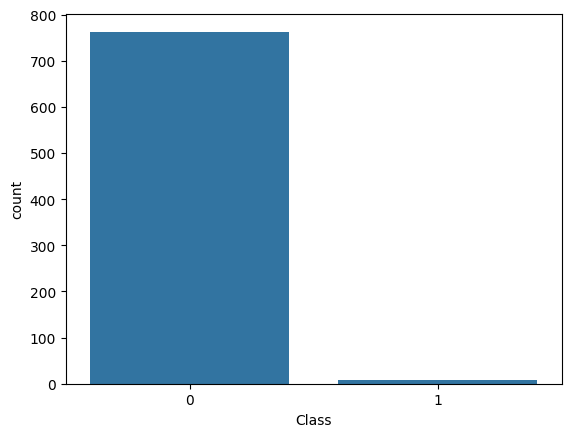

In [4]:
sns.countplot(data, x = 'Class')

#Balancing the dataset by oversampling class 1

Before Oversampling: 
0    763
1      9
Name: Class, dtype: int64
After Oversampling: 
0    763
1    763
Name: Class, dtype: int64


<Axes: title={'center': 'count (target)'}>

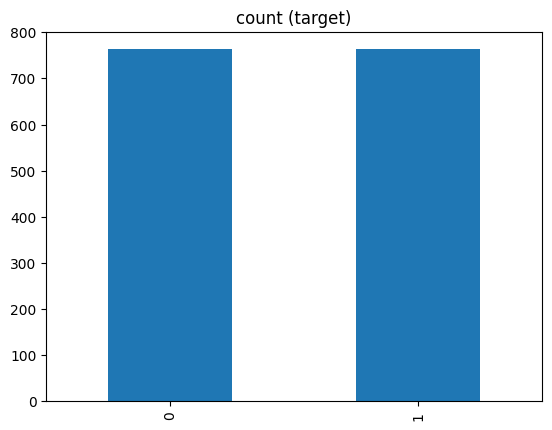

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate input features and target
X = data.drop('Class', axis=1)  #Features
y = data['Class']  # Target variable

# Oversampling the minority class in the training set
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Combine the oversampled features and target into a new DataFrame
new_data = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled, columns=['Class'])], axis=1)

# Checking the balance
print(f"Before Oversampling: \n{y.value_counts()}")
print(f"After Oversampling: \n{y_oversampled.value_counts()}")
y_oversampled.value_counts().plot(kind='bar', title='count (target)')

#Applying Sampling Techniques

SIMPLE RANDOM SAMPLING

sample size calculation:
sample size = round((z^2 * p * (1-p)) /(E^2)) = 385

In [7]:
import random as rd

sample_size = 385

# Perform simple random sampling
random_sample_indices = rd.sample(list(new_data.index.values), sample_size)

# Create a sample DataFrame
sample_1 = new_data.loc[random_sample_indices]
print(sample_1)

      Time        V1        V2        V3        V4        V5        V6  \
1362   492 -1.055612  0.343840  1.653953  0.050613  0.959186 -0.805149   
89      59 -0.773293 -4.146007 -0.932038  0.027094 -1.698307  0.460188   
42      33 -0.607877  1.031345  1.740450  1.232106  0.418592  0.119168   
423    307  1.169209 -0.032254  1.011697  1.353641 -0.876062 -0.320567   
841    538 -1.754915 -0.106120  1.266860 -0.544643  1.016715 -0.236550   
...    ...       ...       ...       ...       ...       ...       ...   
1421   214 -0.085693  0.526741  0.656800  0.125725  0.845745  0.068306   
693    524 -0.795322  0.081238  2.210568  0.268145 -0.506875 -0.303840   
118     76 -0.997176  0.228365  1.715340 -0.420067  0.560838  0.564725   
433    312  0.230981 -2.000483  0.555155  0.600646 -1.551024  0.242333   
1253   235 -0.333068 -0.046155  0.846927  0.315905  1.144241  0.318673   

            V7        V8        V9  ...       V21       V22       V23  \
1362  0.783049 -0.109825 -0.116065  ..

SYSTEMATIC SAMPLING

In [8]:
size = 385
length = len(new_data)
interval = length // size
print('interval:',interval)

rd.seed(42)
first = rd.randint(0, interval)
print('first element:',first)


interval: 3
first element: 0


In [9]:
indexes = np.arange(first, length, step = interval)
sample_2 = new_data.iloc[indexes]
print(sample_2)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
6        4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
9        9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
12      10  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
...    ...       ...       ...       ...       ...       ...       ...   
1512   153  0.811803  0.549251  0.064937  1.103635 -0.390192 -1.114514   
1515   453 -2.192738  0.246850 -0.046748  2.902218  0.621940 -0.651777   
1518   110  1.250828  0.344835  0.293675  0.677241 -0.343510 -1.006242   
1521   233 -0.143424  0.517932  0.731111  0.129628  0.854012  0.001878   
1524   516 -2.181198 -1.036044  1.153616  0.342333  1.069585 -0.553986   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

STARTIFIED SAMPLING

sample size calculation:
sample size = round((z^2 * p * (1-p)) /((E/S)^2)) = 1537

In [15]:
(new_data['Class'].value_counts()) / len(new_data) * 100

0    50.0
1    50.0
Name: Class, dtype: float64

In [12]:
new_data['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

In [17]:
# For stratified sampling
sampled_class_0 = new_data[new_data['Class'] == 0].sample(n = 1537//2, random_state=42, replace =True)
sampled_class_1 = new_data[new_data['Class'] == 1].sample(n = 1537//2, random_state=42, replace =True)

# Combine the samples
sample_3 = pd.concat([sampled_class_0, sampled_class_1])

print(sample_3)

      Time        V1        V2        V3        V4        V5        V6  \
103     69 -0.608027  0.306694  1.473004  1.191127  0.021265  0.888442   
438    315 -1.014693  0.444918  2.259005  0.336946 -0.492326 -0.649977   
273    194 -1.131517  1.016399  0.735810  1.166614  0.790236 -1.187196   
107     71  1.331897 -0.579962  0.422606 -0.897752 -0.746254 -0.056273   
72      47  1.197839  0.236828  0.509605  0.657659 -0.365488 -0.745101   
...    ...       ...       ...       ...       ...       ...       ...   
1044   469 -3.019519 -2.989484  0.999832  2.344787  1.297988 -1.076704   
825    353 -1.002641 -1.029667  1.497517  0.646836  1.673382  0.429334   
979     84  1.236883  0.326230  0.263598  0.623071 -0.248092 -0.787781   
1451   553 -0.230559 -0.941717  1.293643  0.895916  0.930201 -0.308451   
1223   513 -1.621623 -1.473046  2.210621  0.801777  1.933554  0.065932   

            V7        V8        V9  ...       V21       V22       V23  \
103   1.190491  0.042147 -0.446426  ..

CLUSTER SAMPLING

sample size= round((z^2 * p * (1-p)) / (E/C)^2) = 384400

In [19]:
n_clusters = 10
cluster_size = len(new_data) // n_clusters

# Assign each record to a cluster
new_data['Cluster'] = [i % n_clusters for i in range(len(new_data))]

np.random.seed(42)  # Ensure reproducibility
selected_clusters = np.random.choice(range(n_clusters), size=3, replace=False)

# Initialize an empty DataFrame to hold the sampled data
sample_4 = pd.DataFrame()

# Loop through each selected cluster and concatenate
for cluster in selected_clusters:
    cluster_data = new_data[new_data['Cluster'] == cluster]
    sample_4 = pd.concat([sample_4, cluster_data], axis=0)

sample_4 = sample_4.drop(['Cluster'], axis =1)
print(sample_4)


      Time        V1        V2        V3        V4        V5        V6  \
8        7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
18      14 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
28      23 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
38      29  0.996370 -0.122589  0.546819  0.706580  0.134560  1.156995   
48      35  1.386397 -0.794209  0.778224 -0.864708 -1.064132  0.351296   
...    ...       ...       ...       ...       ...       ...       ...   
1485   409 -2.246686  1.878418 -1.451177  3.817249 -0.451702 -1.401660   
1495   260  0.128463 -0.634397  1.051496  0.847763  0.608961 -0.494305   
1505   473 -0.880318  0.395219  1.705649  0.188655  0.945963 -0.882557   
1515   453 -2.192738  0.246850 -0.046748  2.902218  0.621940 -0.651777   
1525   365 -1.073464 -1.133695  1.566331  0.681840  1.729351  0.441039   

            V7        V8        V9  ...       V21       V22       V23  \
8     0.370145  0.851084 -0.392048  ..

In [23]:
new_data = new_data.drop(['Cluster'], axis =1)

BOOTSTRAP SAMPLING

In [29]:
def bootstrap_sample(data, n_samples):
    """Generate a bootstrap sample from the dataset."""
    return new_data.sample(n=n_samples, replace=True)


sample_5 = bootstrap_sample(new_data, len(new_data))

if 'Amount' in sample_5.columns:
    mean_amount = sample_5['Amount'].mean()
    print(f"Mean Amount in Bootstrap Sample: {mean_amount}")

mean_amount_data = new_data['Amount'].mean()
print(f"Mean Amount in our dataset:{mean_amount_data}\n")

print(sample_5)

Mean Amount in Bootstrap Sample: 52.01183247407347
Mean Amount in our dataset:51.45516067577343

      Time        V1        V2        V3        V4        V5        V6  \
707    534 -1.393265 -1.095569  2.607795 -2.529060 -0.135265 -0.373239   
329    241 -2.398446  2.022961  1.628462 -0.540477 -0.512596  0.238407   
1432   416 -2.130440  1.747924 -1.169749  3.496832 -0.326686 -1.357523   
990    516 -1.407126  0.194015  1.413649 -0.313406  0.939339 -0.540930   
322    236 -1.169087  1.096292  0.669688  1.052534  0.422465  0.703450   
...    ...       ...       ...       ...       ...       ...       ...   
774    457 -1.596218 -1.901549  2.074263  0.940207  2.142466  0.527435   
364    266  0.982539 -0.229085  0.003051  1.444009  0.200645  0.636756   
546    409  1.243758 -0.777764  1.016830 -0.250546 -1.268555  0.137280   
270    190 -0.549414  0.676861  2.151950  1.014523 -0.620012  0.076154   
1497   564  1.047940  0.458010  0.194288  0.884982 -0.367452 -1.088581   

            V7

#Training models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "SVC": SVC(probability=True)
}

In [32]:
samples = {
    'Simple Random Sampling' : sample_1 ,
    'Systematic Sampling' : sample_2 ,
    'Stratified Sampling' : sample_3 ,
    'Cluster Sampling' : sample_4 ,
    'Bootstrap Sampling' : sample_5
}

In [36]:
def train_evaluate(models, samples):
    # Initialize a results dictionary
    results = {sample_name: {} for sample_name in samples}

    scaler = StandardScaler()

    for sample_name, sample_data in samples.items():
        X = sample_data.drop('Class', axis=1)
        y = sample_data['Class']

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the features
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for model_name, model in models.items():
            # Train model
            model.fit(X_train_scaled, y_train)

            # Predict on testing set
            y_pred = model.predict(X_test_scaled)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Store results
            results[sample_name][model_name] = accuracy

    return results

# Execute the training and evaluation process
execution = train_evaluate(models, samples)

# Convert the results to a DataFrame for display
results_df = pd.DataFrame(execution)
results_df


,Simple Random Sampling,Systematic Sampling,Stratified Sampling,Cluster Sampling,Bootstrap Sampling
Logistic Regression,0.922078,0.911765,0.944805,0.945652,0.915033
K-Neighbors Classifier,0.870130,0.872549,0.987013,0.891304,0.947712
Random Forest Classifier,0.987013,1.000000,1.000000,0.967391,1.000000
Gradient Boosting Classifier,0.974026,0.990196,0.996753,0.967391,0.986928
SVC,1.000000,0.960784,0.993506,0.989130,0.950980


Random Forest Classifier comes out to be the best model, with average acuracy score of 0.990881.